# 📘 Simulación de Créditos en Matemática Numérica
Este notebook analiza diferentes maneras de asignar créditos a actividades académicas mediante simulaciones. El objetivo es identificar las mejores distribuciones que motivan más la realización de ejercicios y ferias.

## 📚 Bibliotecas

In [11]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Crear carpeta para guardar imágenes
os.makedirs("graficas_simulacion", exist_ok=True)


## ⚙️ Variables y configuración del modelo
Se definen las actividades con su esfuerzo estimado y los perfiles de estudiantes con diferente disposición al esfuerzo. El esfuerzo puede ser modificado segun el tipo de actividades en el curso.

In [12]:
actividades_simulacion = [
    ("Ejercicios_CP01", 1.5, "CP"),
    ("Ejercicios_CP05", 1.5, "CP"),
    ("Ejercicios_CP06", 1.5, "CP"),
    ("Hacer_TC", 3.5, "TC"),
    ("Resolver_TC", 4.0, "TC"),
    ("Exponer_TC", 1.0, "TC"),
    ("Feria_Flotante", 4.0, "Feria"),
    ("Feria_Errores", 4.0, "Feria"),
    ("Feria_Sistemas", 4.0, "Feria"),
    ("Feria_Interpolacion", 4.0, "Feria"),
    ("Feria_Combinada", 4.5, "Feria"),
    ("Tarea_Extra1", 3.0, "Extra"),
    ("Tarea_Extra2", 3.5, "Extra"),
    ("Participar_Clase", 0.5, "Clase"),
    ("Detectar_Errores", 1.0, "Clase"),
    ("Hacer_Meme", 0.3, "Meme"),
    ("Hacer_Chiste", 0.3, "Meme")
]

perfiles_estudiantes = {
    "Barco": {"tiempo_max": 10, "peso_esfuerzo": 0.2},
    "Media": {"tiempo_max": 20, "peso_esfuerzo": 0.5},
    "Brillante": {"tiempo_max": 35, "peso_esfuerzo": 1.0},
}


## 🔁 Simulación de decisiones
Cada estudiante escoge actividades que maximizan su beneficio (créditos/esfuerzo) hasta agotar su tiempo disponible.

In [13]:
def simular_estudiante(perfil, creditos_dict):
    tiempo_disponible = perfiles_estudiantes[perfil]["tiempo_max"]
    peso_esfuerzo = perfiles_estudiantes[perfil]["peso_esfuerzo"]
    actividades_utilidad = []

    for act_id, esfuerzo, categoria in actividades_simulacion:
        credito = creditos_dict[act_id]
        utilidad = (credito / esfuerzo) * peso_esfuerzo
        actividades_utilidad.append((utilidad, act_id, esfuerzo, categoria))

    actividades_utilidad.sort(reverse=True)
    tiempo_actual = 0
    seleccionadas = []

    for utilidad, act_id, esfuerzo, categoria in actividades_utilidad:
        if tiempo_actual + esfuerzo <= tiempo_disponible:
            seleccionadas.append((act_id, categoria))
            tiempo_actual += esfuerzo

    return seleccionadas


## 🧪 Ejecución de 100 simulaciones con distribuciones aleatorias de créditos (rango: 1 a 100)
* Nota: El rango se debe multiplicar por un 10 mil para q simulen los valores reales en creditos q se le asignan a las actividades.

In [14]:
resultados_simulacion = []

for _ in range(100):
    creditos_random = {
        act[0]: random.randint(1, 100) for act in actividades_simulacion
    }
    resultado = {"créditos": creditos_random}
    for perfil in perfiles_estudiantes:
        seleccionadas = simular_estudiante(perfil, creditos_random)
        categorias = [cat for _, cat in seleccionadas]
        resultado[f"{perfil}_total"] = len(seleccionadas)
        resultado[f"{perfil}_ejercicios"] = categorias.count("CP")
        resultado[f"{perfil}_memes"] = categorias.count("Meme")
        resultado[f"{perfil}_ferias"] = categorias.count("Feria")
        resultado[f"{perfil}_creditos"] = sum([creditos_random[act] for act, _ in seleccionadas])
    resultados_simulacion.append(resultado)

df_resultados = pd.DataFrame(resultados_simulacion)
df_resultados.to_csv("graficas_simulacion/resultados_simulacion.csv", index=False)
df_resultados.head()


,créditos,Barco_total,Barco_ejercicios,Barco_memes,Barco_ferias,Barco_creditos,Media_total,Media_ejercicios,Media_memes,Media_ferias,Media_creditos,Brillante_total,Brillante_ejercicios,Brillante_memes,Brillante_ferias,Brillante_creditos
0,"{'Ejercicios_CP01': 17, 'Ejercicios_CP05': 81,...",8,2,2,0,547,11,3,2,1,731,15,3,2,4,1029
1,"{'Ejercicios_CP01': 89, 'Ejercicios_CP05': 44,...",7,3,2,1,445,11,3,2,2,596,14,3,2,4,700
2,"{'Ejercicios_CP01': 27, 'Ejercicios_CP05': 21,...",6,0,2,1,387,10,1,2,2,595,15,3,2,3,803
3,"{'Ejercicios_CP01': 4, 'Ejercicios_CP05': 67, ...",8,2,2,0,419,11,3,2,1,551,15,3,2,3,669
4,"{'Ejercicios_CP01': 60, 'Ejercicios_CP05': 62,...",8,2,2,0,515,11,3,2,1,663,15,3,2,3,824


## 📊 Estadísticas globales

In [15]:
estadisticas = df_resultados.describe().T
estadisticas.to_csv("graficas_simulacion/estadisticas_simulacion.csv")
estadisticas


,count,mean,std,min,25%,50%,75%,max
Barco_total,100.0,7.69,0.506423,6.0,7.00,8.0,8.00,8.0
Barco_ejercicios,100.0,2.19,0.614554,0.0,2.00,2.0,3.00,3.0
Barco_memes,100.0,1.95,0.219043,1.0,2.00,2.0,2.00,2.0
Barco_ferias,100.0,0.21,0.409360,0.0,0.00,0.0,0.00,1.0
Barco_creditos,100.0,466.47,70.239483,326.0,414.50,469.5,519.50,670.0
Media_total,100.0,10.84,0.394917,9.0,11.00,11.0,11.00,11.0
Media_ejercicios,100.0,2.80,0.550482,1.0,3.00,3.0,3.00,3.0
Media_memes,100.0,2.00,0.000000,2.0,2.00,2.0,2.00,2.0
Media_ferias,100.0,1.55,0.729951,0.0,1.00,2.0,2.00,3.0
Media_creditos,100.0,656.63,82.287947,456.0,598.25,651.5,717.25,940.0


## 📈 Gráficos de barras de promedios por perfil

In [16]:
promedios = estadisticas["mean"]
labels = ["total", "ejercicios", "memes", "ferias"]
for perfil in perfiles_estudiantes:
    plt.figure(figsize=(6,4))
    datos = [promedios[f"{perfil}_{l}"] for l in labels]
    plt.bar(labels, datos, color="skyblue")
    plt.title(f"Promedio de actividades por tipo - {perfil}")
    plt.ylabel("Promedio")
    plt.savefig(f"graficas_simulacion/promedio_{perfil}.png")
    plt.close()


## 📊 Comparación conjunta de perfiles

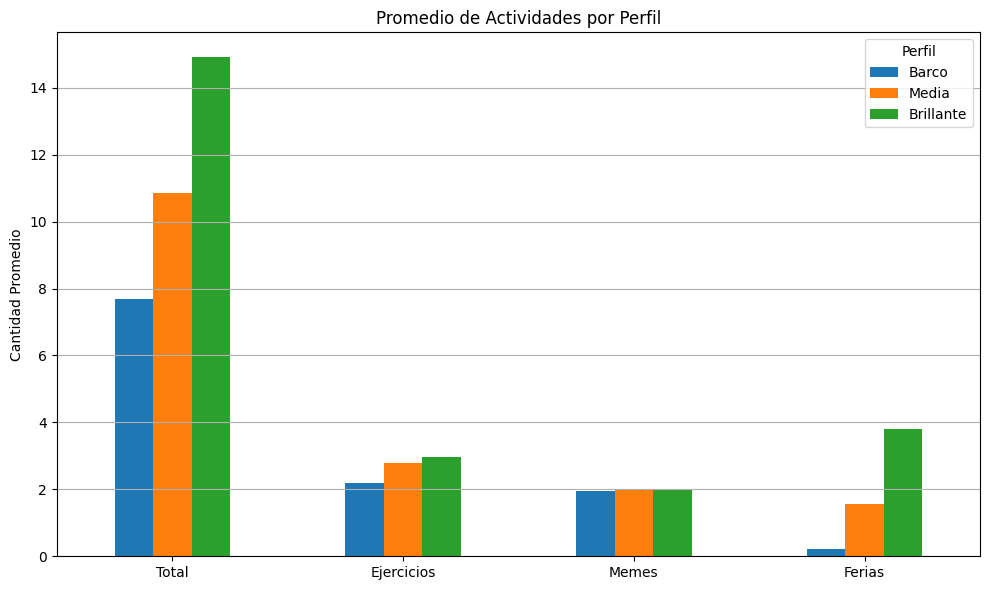

In [17]:
df_plot = pd.DataFrame({
    "Barco": [promedios["Barco_total"], promedios["Barco_ejercicios"], promedios["Barco_memes"], promedios["Barco_ferias"]],
    "Media": [promedios["Media_total"], promedios["Media_ejercicios"], promedios["Media_memes"], promedios["Media_ferias"]],
    "Brillante": [promedios["Brillante_total"], promedios["Brillante_ejercicios"], promedios["Brillante_memes"], promedios["Brillante_ferias"]],
}, index=["Total", "Ejercicios", "Memes", "Ferias"])

df_plot.plot(kind="bar", figsize=(10,6), title="Promedio de Actividades por Perfil")
plt.ylabel("Cantidad Promedio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis="y")
plt.legend(title="Perfil")
plt.savefig("graficas_simulacion/actividades_comparadas_perfiles.png")
plt.show()


## 🏆 Mejores distribuciones (por ejercicios realizados)

In [18]:
df_resultados["suma_ejercicios"] = (
    df_resultados["Barco_ejercicios"] +
    df_resultados["Media_ejercicios"] +
    df_resultados["Brillante_ejercicios"]
)

top_10_ejercicios = df_resultados.sort_values(by="suma_ejercicios", ascending=False).head(10)
top_10_ejercicios.to_csv("graficas_simulacion/top_10_ejercicios.csv", index=False)
top_10_ejercicios


,créditos,Barco_total,Barco_ejercicios,Barco_memes,Barco_ferias,Barco_creditos,Media_total,Media_ejercicios,Media_memes,Media_ferias,Media_creditos,Brillante_total,Brillante_ejercicios,Brillante_memes,Brillante_ferias,Brillante_creditos,suma_ejercicios
74,"{'Ejercicios_CP01': 38, 'Ejercicios_CP05': 33,...",8,3,2,0,413,11,3,2,3,613,15,3,2,5,779,9
38,"{'Ejercicios_CP01': 71, 'Ejercicios_CP05': 85,...",8,3,2,0,621,11,3,2,1,789,15,3,2,3,975,9
24,"{'Ejercicios_CP01': 51, 'Ejercicios_CP05': 70,...",7,3,1,0,423,11,3,2,3,659,15,3,2,4,920,9
25,"{'Ejercicios_CP01': 65, 'Ejercicios_CP05': 61,...",8,3,2,0,450,11,3,2,2,685,15,3,2,4,799,9
73,"{'Ejercicios_CP01': 81, 'Ejercicios_CP05': 97,...",8,3,2,0,471,11,3,2,1,743,15,3,2,4,812,9
70,"{'Ejercicios_CP01': 53, 'Ejercicios_CP05': 35,...",8,3,2,0,434,11,3,2,2,635,15,3,2,4,823,9
32,"{'Ejercicios_CP01': 43, 'Ejercicios_CP05': 48,...",8,3,2,0,398,11,3,2,1,628,15,3,2,4,809,9
34,"{'Ejercicios_CP01': 72, 'Ejercicios_CP05': 59,...",7,3,1,0,527,11,3,2,0,676,15,3,2,3,787,9
65,"{'Ejercicios_CP01': 86, 'Ejercicios_CP05': 22,...",7,3,2,0,461,11,3,2,1,588,15,3,2,4,654,9
63,"{'Ejercicios_CP01': 46, 'Ejercicios_CP05': 74,...",8,3,2,0,478,11,3,2,1,718,15,3,2,4,856,9


In [19]:
# === Exportar mejor distribución de créditos según ejercicios ===

def generar_mejor_distribucion(df_resultados, output_path):
    columna_objetivo = next((col for col in df_resultados.columns if 'ejercicio' in col.lower()), None)
    if not columna_objetivo:
        raise ValueError("No se encontró una columna que indique la cantidad de ejercicios.")

    mejor_fila = df_resultados.sort_values(by=columna_objetivo, ascending=False).iloc[0]

    actividades_creditos = {
        col: val for col, val in mejor_fila.items()
        if isinstance(val, (int, float)) and col not in ['tipo_estudiante', columna_objetivo]
    }

    df_mejor = pd.DataFrame(list(actividades_creditos.items()), columns=["Actividad", "Créditos Asignados"])
    df_mejor.to_csv("mejor_distribucion_creditos.csv", index=False)
    print("✅ Archivo 'mejor_distribucion_creditos.csv' creado con la mejor combinación de créditos.")
    return df_mejor

# Ejecutar la función
df_mejor_distribucion = generar_mejor_distribucion(df_resultados, "mejor_distribucion_creditos.csv")
df_mejor_distribucion.head()


✅ Archivo 'mejor_distribucion_creditos.csv' creado con la mejor combinación de créditos.


,Actividad,Créditos Asignados


In [20]:
# === AJUSTE DE SIMULACIÓN: INCLUIR TODAS LAS CPs Y LIMITAR MEMES/CHISTES/PARTICIPAR ===

CP_EJERCICIOS = [f"Ejercicios_CP0{i}" for i in range(1, 7)]
ACTIVIDADES_CLAVE = ["Hacer_TC", "Resolver_TC", "Exponer_TC", "Participar_Clase", "Detectar_Errores",
                     "Hacer_Meme", "Hacer_Chiste", "Tarea_Extra1", "Tarea_Extra2"] + CP_EJERCICIOS

FERIAS = ["Feria_Flotante", "Feria_Errores", "Feria_Sistemas", "Feria_Interpolacion", "Feria_Combinada"]

TODAS_ACTIVIDADES = CP_EJERCICIOS + ACTIVIDADES_CLAVE + FERIAS

def generar_recompensas_controladas():
    recompensas = {}
    for act in TODAS_ACTIVIDADES:
        if act in ["Hacer_Meme", "Hacer_Chiste"]:
            recompensas[act] = random.randint(1, 25)  # Créditos bajos
        elif act in ["Participar_Clase", "Detectar_Errores"]:
            recompensas[act] = random.randint(10, 40)  # Intermedios
        else:
            recompensas[act] = random.randint(20, 100)  # Actividades importantes
    return recompensas

In [21]:
# === MEJORAS EN LA SIMULACIÓN: GUARDAR LA MEJOR DISTRIBUCIÓN DE CRÉDITOS ===

import random
import pandas as pd
import os

# Lista de todas las actividades evaluativas
TODAS_ACTIVIDADES = [
    "Ejercicios_CP01", "Ejercicios_CP02", "Ejercicios_CP03",
    "Ejercicios_CP04", "Ejercicios_CP05", "Ejercicios_CP06",
    "Hacer_TC", "Resolver_TC", "Exponer_TC",
    "Feria_Flotante", "Feria_Errores", "Feria_Sistemas",
    "Feria_Interpolacion", "Feria_Combinada",
    "Tarea_Extra1", "Tarea_Extra2",
    "Participar_Clase", "Detectar_Errores",
    "Hacer_Meme", "Hacer_Chiste"
]

# Generar distribución de créditos con restricciones por tipo de actividad
def generar_creditos_controlados():
    creditos = {}
    for act in TODAS_ACTIVIDADES:
        if act in ["Hacer_Meme", "Hacer_Chiste"]:
            creditos[act] = random.randint(1, 25)
        elif act in ["Participar_Clase", "Detectar_Errores"]:
            creditos[act] = random.randint(10, 40)
        else:
            creditos[act] = random.randint(20, 100)
    return creditos

# Simular 100 combinaciones y seleccionar la mejor según suma de ejercicios
mejor_creditos = None
mejor_suma_ejercicios = 0

for _ in range(100):
    distribucion = generar_creditos_controlados()
    suma_ejercicios = sum(distribucion[act] for act in distribucion if "Ejercicios_CP" in act)
    if suma_ejercicios > mejor_suma_ejercicios:
        mejor_suma_ejercicios = suma_ejercicios
        mejor_creditos = distribucion.copy()

# Exportar a carpeta local
carpeta_export = os.path.expanduser("~/Desktop/MMA")
os.makedirs(carpeta_export, exist_ok=True)

# Exportar como CSV
df_mejor = pd.DataFrame(list(mejor_creditos.items()), columns=["Actividad", "Créditos Asignados"])
csv_path = os.path.join(carpeta_export, "mejor_distribucion_creditos.csv")
df_mejor.to_csv(csv_path, index=False)

# Exportar como TXT
txt_path = os.path.join(carpeta_export, "mejor_distribucion_creditos.txt")
with open(txt_path, "w", encoding="utf-8") as f:
    f.write("Asignación de Créditos - Mejor Simulación\n\n")
    for act, val in mejor_creditos.items():
        f.write(f"{act}: {val}\n")